In [1]:
#This is where we will write our project 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [403]:
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

#We initiate our printing as nice equations, using the sympy package 
sm.init_printing(use_unicode=True)


In [404]:
#defining all variables as symby symbols 
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
c = sm.symbols('c')
a = sm.symbols('a')
b = sm.symbols("b")
pi1 = sm.symbols('pi_1')
pi2 = sm.symbols('pi_2')

#Now we define the equations describing the relationship between the two firms 
#prices (p), costs(c), someting(a), revenue(pi) and quantity(q).
p1 = (a-b*(q1+q2))
p2 = (a-b*(q1+q2))
pi1 =(p1*q1-c*q1)
pi2 = (p2*q2-c*q2)


In order to solve the cournot-quilibrium, we maximise the the quantity firm 1 produces

In [405]:

#Take the derivative wrt. to q1 and q2 respecticly
#to get the optimal quantity of firm 1 and firm 2:

foc1=sm.diff(pi1,q1)
foc1

foc2=sm.diff(pi2,q2)
foc2

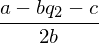

In [406]:
# We solve the first firms equation equal to 0
sol1= sm.solve(sm.Eq(foc1,0),q1)[0]
sol1

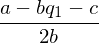

In [407]:
# We solve the second firms equation equal to 0
sol2= sm.solve(sm.Eq(foc2,0),q2)[0]
sol2


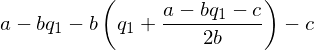

In [408]:
#We then substitute the q2 in equation 1
sol1_subs = foc1.subs(q2,sol2)
sol1_subs



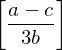

In [409]:
#then we solve the first equation for the quantity
sol1_subs_solve = sm.solve(sm.Eq(sol1_subs,0),q1)
sol1_subs_solve

The optimal quantity for a firm to produce, that is the Cournot-Equilibrium, is described a the cost minus the (whatever a is) 

In [470]:

def reaction(q_other, a=100, b=1, cost=1):
    quantity = (a-b*q_other - cost)/2*b
    
    return quantity

def reaction_plot(q_other, a=100, b=1, cost=1):
    quantity = reaction(q_other,a, b, cost)
    
    #ax = plt.subplot()
    plt.scatter(quantity,q_other,label = "Firm 1's reaction curve")
    plt.scatter(q_other,quantity,label = "Firm 2's reaction curve")
    plt.xlabel("Firm 1 quantity")
    plt.ylabel("Firm 2 quantity")
    plt.legend()
    plt.xlim(0,100)
    plt.ylim(0,100)

    plt.show()
    return 

def optimal(a, b, cost):
    equilibrium = (a-cost)/3*b
    
    return equilibrium


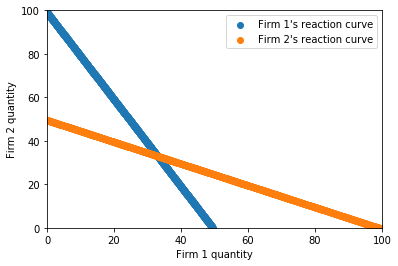

In [471]:
x = np.linspace(0, 100, 1000);
reaction_plot(q_other=x)

In [473]:
widgets.interact(reaction_plot,q_other=widgets.IntSlider(min=0,max=100,step=5,value=50))




interactive(children=(IntSlider(value=50, description='q_other', step=5), IntSlider(value=100, description='a'…

<function __main__.reaction_plot(q_other, a=100, b=1, cost=1)>

In [468]:
a=widgets.IntSlider(min=0,max=100,step=5,value=100),b=1),
                 cost=1,q_other=widgets.IntSlider(min=0,max=100,step=5,value=50))

SyntaxError: invalid syntax (<ipython-input-468-fe435f080007>, line 1)

In [427]:
def f(n):
    plt.plot([0,1,2],[0,1,n])
    plt.show()
widgets.interact(f,n=(0,10))

interactive(children=(IntSlider(value=5, description='n', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.f(n)>